Desafio 21: Desempenho de Campanhas de Marketing Digital

📂 Dataset: Histórico de campanhas de marketing digital com métricas de desempenho.
Colunas: Campanha, Canal, Custo, Cliques, Conversoes, Publico_Alvo, Resultado

🎯 Atividades:

Qual campanha teve o maior número de conversões?

Qual canal gerou a melhor média de conversão (número de conversões por clique)?

Qual foi o custo total das campanhas voltadas para o público "Empresas"?

Qual o canal mais usado em campanhas de “Alta Conversão”?

Crie um gráfico de dispersão (scatter plot) comparando cliques e conversões para identificar padrões.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_21_marketing_digital.csv")
df.head()

,Campanha,Canal,Custo,Cliques,Conversoes,Publico_Alvo,Resultado
0,Lançamento Produto X,Email,30264.46,9289,635,Empresas,Média Conversão
1,Volta às Aulas,TV,21984.33,2243,192,Adultos,Média Conversão
2,Natal 2024,Email,21455.60,1427,634,Idosos,Baixa Conversão
3,Lançamento Produto X,Email,43687.45,8962,384,Empresas,Alta Conversão
4,Dia das Mães,Redes Sociais,38336.74,9832,587,Adultos,Baixa Conversão


In [22]:
#Qual campanha teve o maior número de conversões?
campanhaMaiorConversao = df.groupby("Campanha")["Conversoes"].sum().sort_values(ascending=False)
print(f"Campanha com o maior número de conversões: {campanhaMaiorConversao.idxmax()}")

Campanha com o maior número de conversões: Volta às Aulas


In [14]:
#Qual canal gerou a melhor média de conversão (número de conversões por clique)?
df["Conversão_Clique"] = df["Conversoes"] / df["Cliques"]
conversaoCanal = df.groupby("Canal")["Conversão_Clique"].mean().sort_values(ascending=False)
print(f"Canal que gerou a melhor média de conversão: {conversaoCanal.idxmax()}")

Canal que gerou a melhor média de conversão: Rádio


In [12]:
#Qual foi o custo total das campanhas voltadas para o público "Empresas"?
empresas = df[df["Publico_Alvo"] == "Empresas"]
custoTotal = empresas["Custo"].sum()
print(f"Custo total das campanhas para o público 'Empresas': R$ {custoTotal:.2f}")

Custo total das campanhas para o público 'Empresas': R$ 719305.42


In [13]:
#Qual o canal mais usado em campanhas de “Alta Conversão”?
altaConversao = df[df["Resultado"] == "Alta Conversão"]
canalMaisUsado = altaConversao["Canal"].value_counts()
print(f"Canal mais usado em campanhas de Alta Conversão: {canalMaisUsado.idxmax()}")

Canal mais usado em campanhas de Alta Conversão: Email


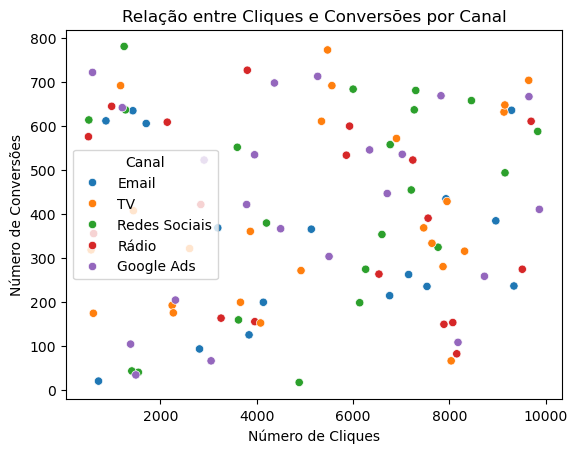

In [21]:
#Crie um gráfico de dispersão (scatter plot) comparando cliques e conversões para identificar padrões.
sns.scatterplot(data=df, x="Cliques", y="Conversoes", hue="Canal")
plt.title("Relação entre Cliques e Conversões por Canal")
plt.xlabel("Número de Cliques")
plt.ylabel("Número de Conversões")
plt.show()